# First model

Train a small CNN to recognize game screenshots

In [1]:
from fastai.vision.all import *
from pathlib import Path

In [2]:
data_path = Path("../Data")

data_path.ls()

(#4) [Path('../Data/valid'),Path('../Data/train'),Path('../Data/models'),Path('../Data/test')]

In [3]:
files = get_image_files(data_path)

In [4]:
files

(#201) [Path('../Data/valid/Dark Souls 3/tKMg9ko.jpg'),Path('../Data/valid/Dark Souls 3/Firelink_Tower_header_image.0.0.1487687404.0.jpg'),Path('../Data/valid/Dark Souls 3/dark-souls-3-screenshots-feature02-1280x720.jpg'),Path('../Data/valid/Dark Souls 3/Dark-Souls-3-Screenhots-zum-Rollenspiel-658x370-c42f3ab8ff45b4af.jpg'),Path('../Data/valid/Dark Souls 3/maxresdefault.jpg'),Path('../Data/valid/Dark Souls 3/dark-souls-3-cut-content-1280x720.jpg'),Path('../Data/valid/Dark Souls 2/dark-souls-2-csk-screenshot-7-379x253-c.jpg'),Path('../Data/valid/Dark Souls 2/dark-souls-2-crown-of-the-ivory-king-07.png'),Path('../Data/valid/Dark Souls 2/4984478971723776.jpeg'),Path('../Data/valid/Dark Souls 2/PXoux8QSJxmYbt4P6THwXZ.jpg')...]

In [25]:
dls = ImageDataLoaders.from_folder(data_path, item_tfms=Resize(224*3), batch_tfms=aug_transforms(size=224*2), bs=32)

In [26]:
dls.show_batch()

RuntimeError: CUDA out of memory. Tried to allocate 166.00 MiB (GPU 0; 7.80 GiB total capacity; 6.08 GiB already allocated; 89.19 MiB free; 6.33 GiB reserved in total by PyTorch)

In [27]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(epochs=10, base_lr=3e-3, freeze_epochs=1)

epoch,train_loss,valid_loss,error_rate,time
0,3.737075,7.087099,0.816327,00:04


epoch,train_loss,valid_loss,error_rate,time
0,2.567638,5.147442,0.816327,00:03
1,2.396106,3.927438,0.836735,00:03
2,2.077642,3.154173,0.775510,00:03
3,1.706330,2.533690,0.714286,00:03
4,1.439456,2.237349,0.653061,00:03
5,1.213328,2.038630,0.571429,00:03
6,1.043346,1.953349,0.489796,00:03
7,0.918823,1.862825,0.469388,00:03
8,0.807467,1.822249,0.448980,00:03
9,0.740269,1.757890,0.448980,00:02


In [17]:
print(learn.metrics[0].value.)

TensorCategory(0.5714)


In [21]:
# display the error rate of the current model
print("the error rate is: ", learn.metrics[0].value.tolist())

the error rate is:  0.5714285373687744


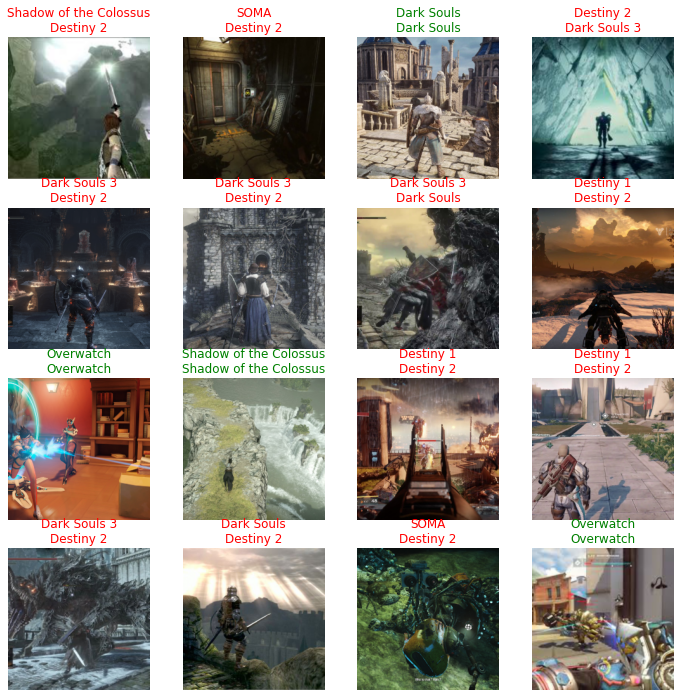

In [98]:
learn.show_results(max_n=16)

In [11]:
interp = Interpretation.from_learner(learn)

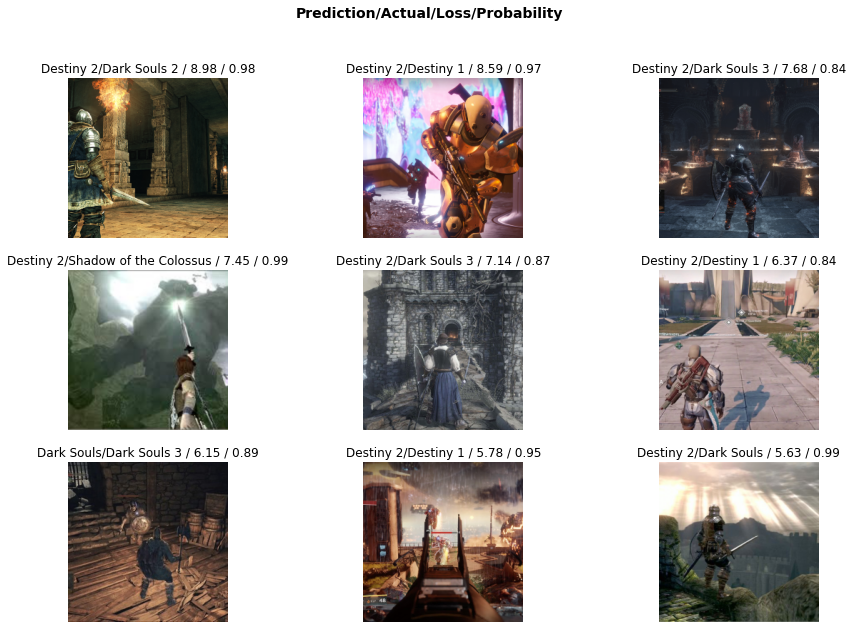

In [12]:
# this will show the images that caused the most confusion from the network
interp.plot_top_losses(9, figsize=(15,10))